In [2]:
import dmba

# Question 1: Shipments of Household Appliances: Line Graphs

In [3]:
appliance_shipments = dmba.load_data('ApplianceShipments.csv')

## a) Time Plot

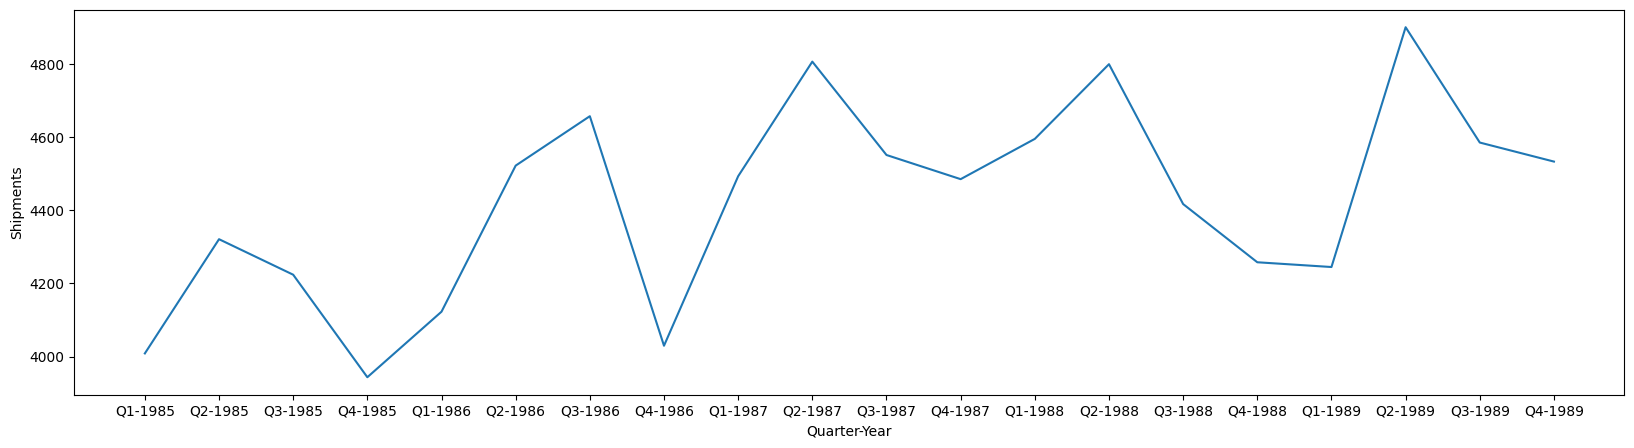

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,5))
plt.xlabel("Quarter-Year")
plt.ylabel("Shipments")
plt.plot(appliance_shipments['Quarter'], appliance_shipments['Shipments'])

b) The trend while from year to year is increasing and decreasing the overall trend seems to be increasing

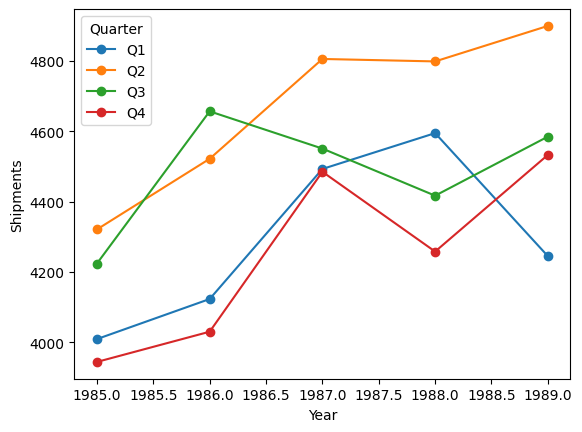

In [108]:
import pandas as pd

df = pd.DataFrame(appliance_shipments)
df['Q'] = df['Quarter'].str[1].astype(int)
df['Year'] = df['Quarter'].str[-4:].astype(int)

quarterly = df.groupby(["Q", "Year"])["Shipments"].sum().unstack()

for quarter in quarterly.index:
    plt.plot(quarterly.columns, quarterly.loc[quarter], 
             marker='o', label=f'Q{quarter}')
plt.legend(title="Quarter")
plt.xlabel("Year")
plt.ylabel("Shipments")
plt.show()

Quarter 4 seems to be the lowest most of the time, while q2 seems to be the best most of the time  
Over all though, overall they all seem to be increasing over time.

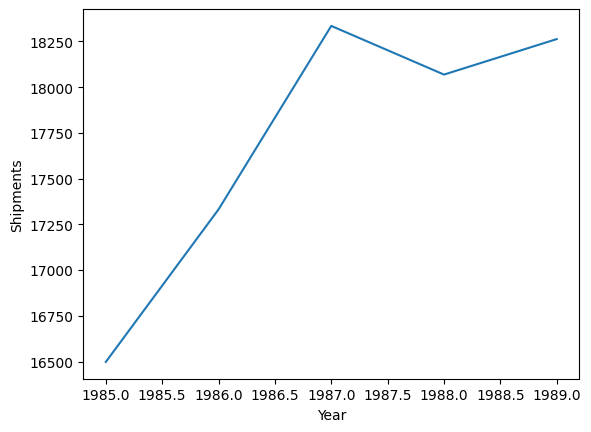

In [109]:
import pandas as pd

yearlyDF = df.groupby(["Year"])["Shipments"].sum()
plt.xlabel("Year")
plt.ylabel("Shipments")
plt.plot(yearlyDF)
plt.show()

# Question 2: Sales of Riding Mowers: Scatter Plots

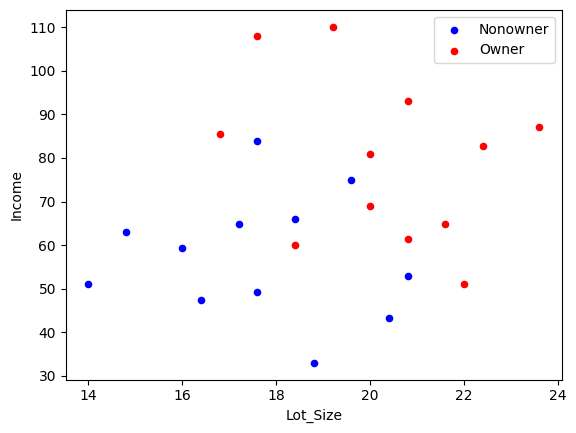

In [143]:
riding_mowers = pd.DataFrame(dmba.load_data('RidingMowers.csv'))
colors = {"Owner": "red", "Nonowner": "blue"}

fig, ax = plt.subplots()
grouped = riding_mowers.groupby("Ownership")
for key, group in grouped:
     group.plot(ax=ax, kind='scatter', x=1, y=0, label=key, color=colors[key])

# Question 3: Laptop Sales at a London Computer Chain: Bar Charts and Boxplots

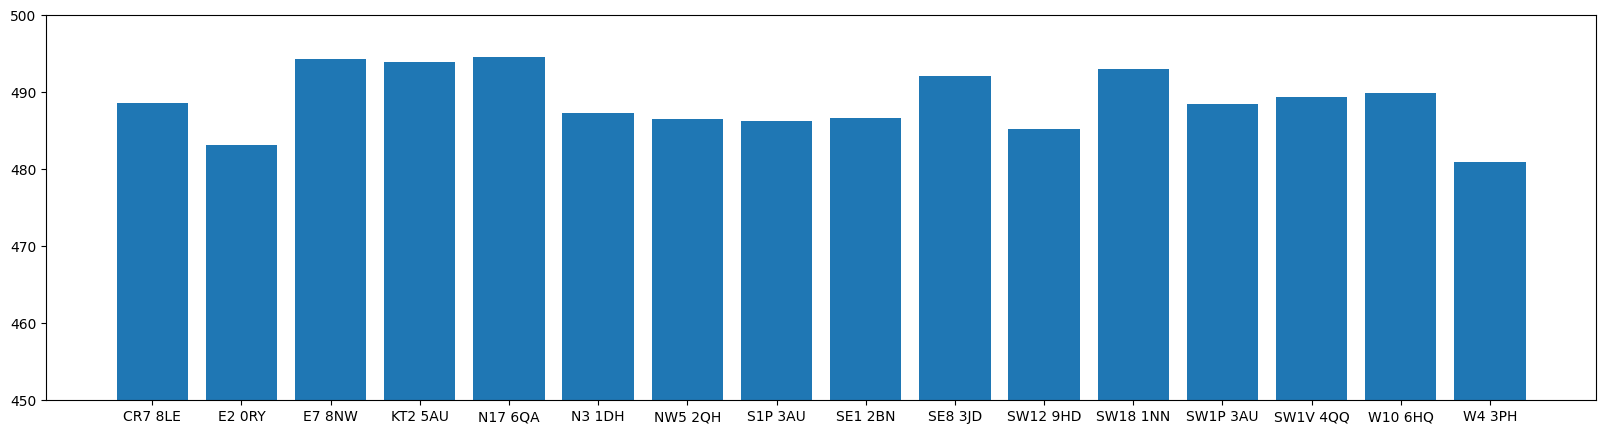

Max:
 Store Postcode       N17 6QA
Retail Price      494.634146
Name: 4, dtype: object
Min:
 Store Postcode        W4 3PH
Retail Price      481.006289
Name: 15, dtype: object


In [52]:
import pandas as pd
import dmba
import matplotlib.pyplot as plt
laptop_sales = pd.DataFrame(dmba.load_data('LaptopSalesJanuary2008.csv'))

avg_prices = pd.DataFrame(laptop_sales.groupby(["Store Postcode"])["Retail Price"].mean().reset_index(name = "Retail Price"))

plt.figure(figsize=(20,5))
plt.bar(avg_prices["Store Postcode"], avg_prices["Retail Price"])
plt.ylim(bottom=450, top=500)
plt.show()
print("Max:\n", avg_prices.iloc[avg_prices.idxmax().iloc[1]])
print("Min:\n", avg_prices.iloc[avg_prices.idxmin().iloc[1]])

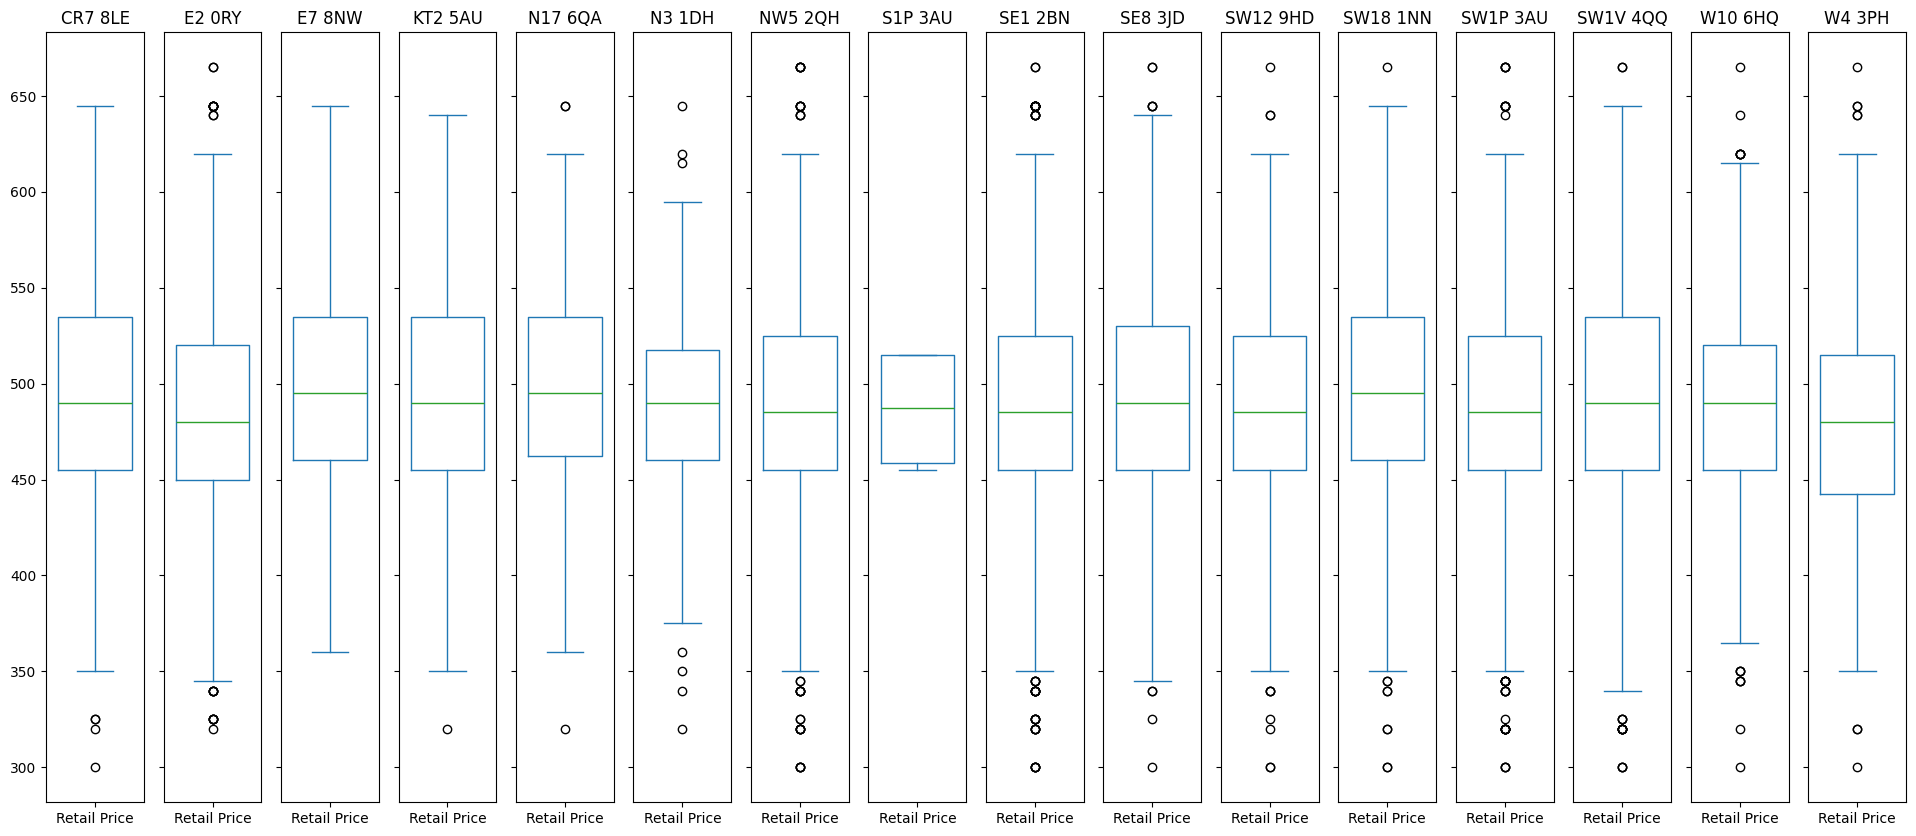

In [110]:
prices = laptop_sales.groupby(["Store Postcode"])["Retail Price"]

num_stores = prices.ngroups
fig, axes = plt.subplots(nrows=1, ncols=num_stores, figsize=(num_stores * 1.5, 10), sharey=True)

for ax, (store, group) in zip(axes, prices):
    group.plot(kind='box', ax=ax, widths=0.75)
    ax.set_title(store[0])

plt.show()

Store N17 6QA and store W4 3PH have very similar price distributions with the main difference is the amount of outliers that W4 would have being greater than N17.

# Question 4: Breakfast Cereals

In [5]:
import dmba

df = dmba.load_data('Cereals.csv')
print(df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100%_Bran   N    C        70        4    1     130   10.0   
1           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4              Almond_Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat_Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties_Honey_Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

Numerical / Ordinal:
- Calories
- Protein
- Fat
- Sodium
- Fiber
- Carbohydrates
- Sugars
- Potassium
- Vitamins
- Weight
- Cups
- Ratings

Numerical / Nominal:
- Shelf

In [118]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


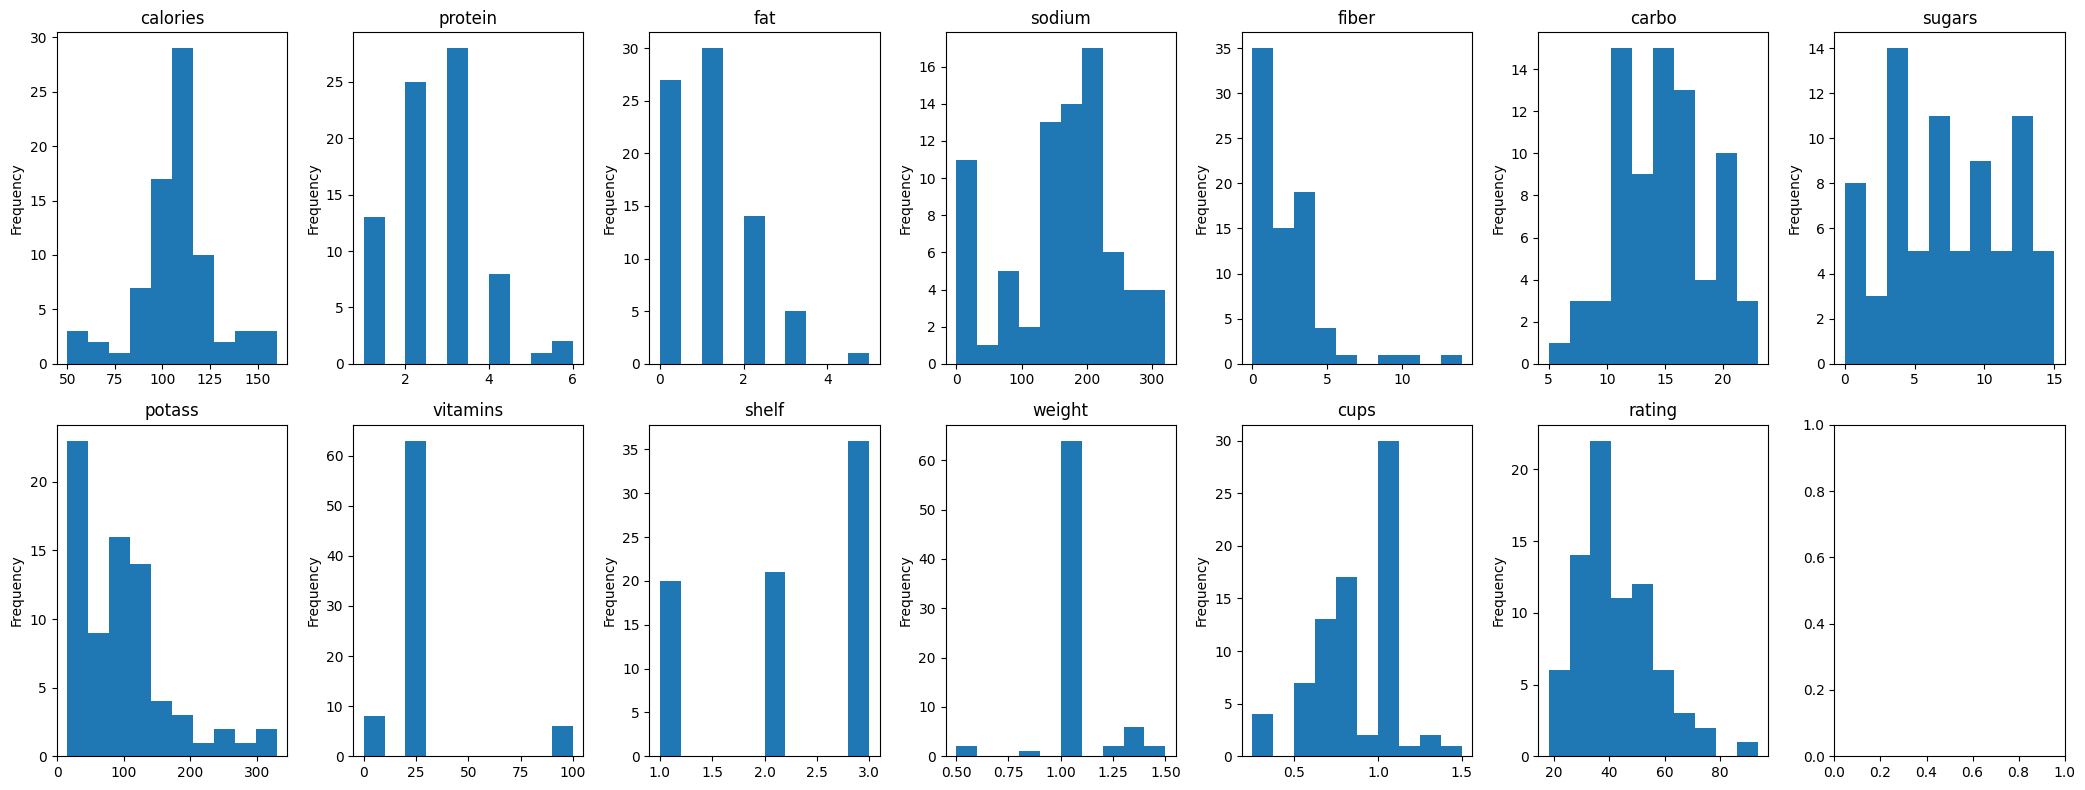

In [165]:
n_columns = 13
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(21, 8))

axes = axes.flatten()
for ax, col in zip(axes, df.columns[3:]):
    df[col].plot(kind='hist', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

1. The columns with the highest variance are sodium, potassium, and Vitamins
2. Columns that seem skewed are fiber, rating, potassium, fat, and protein.
3. The Vitamin outliers compared to the mean seem extreme seeming as there is 100%. Ratings outlier seems a bit extreme as well as it gets really close to 100. Max Fiber outlier also seems extreme as its the biggest outlier when the mean is around 2 and the fiber is 14.

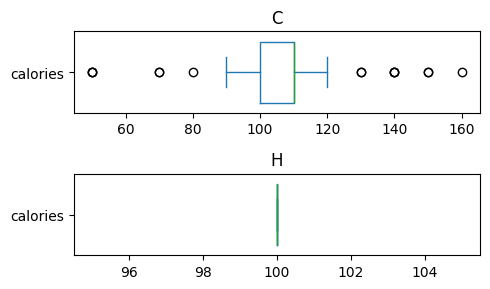

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,3))

axes = axes.flatten()
calories = df.groupby(["type"])["calories"]
for ax, (key, group) in zip(axes, calories):
    group.plot(kind="box", ax=ax, widths=0.75, vert=0)
    ax.set_title(key[0])

plt.tight_layout()
plt.show()

The two box plots show that the Hot cereals consistently have a 100 calorie count while the cold cereals are more varied.

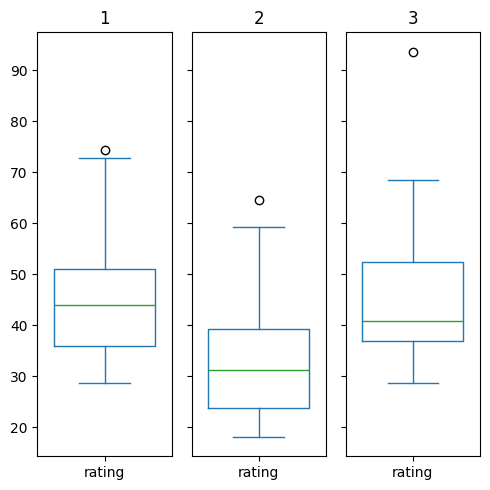

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5,5), sharey=True)

axes = axes.flatten()
calories = df.groupby(["shelf"])["rating"]
for ax, (key, group) in zip(axes, calories):
    group.plot(kind="box", ax=ax, widths=0.75, vert=1)
    ax.set_title(key[0])

plt.tight_layout()
plt.show()

The Shelf seems to have a slight determinant when it comes to being on shelf 2 but in all consideration shelf height should not be taken into account for possible categories.

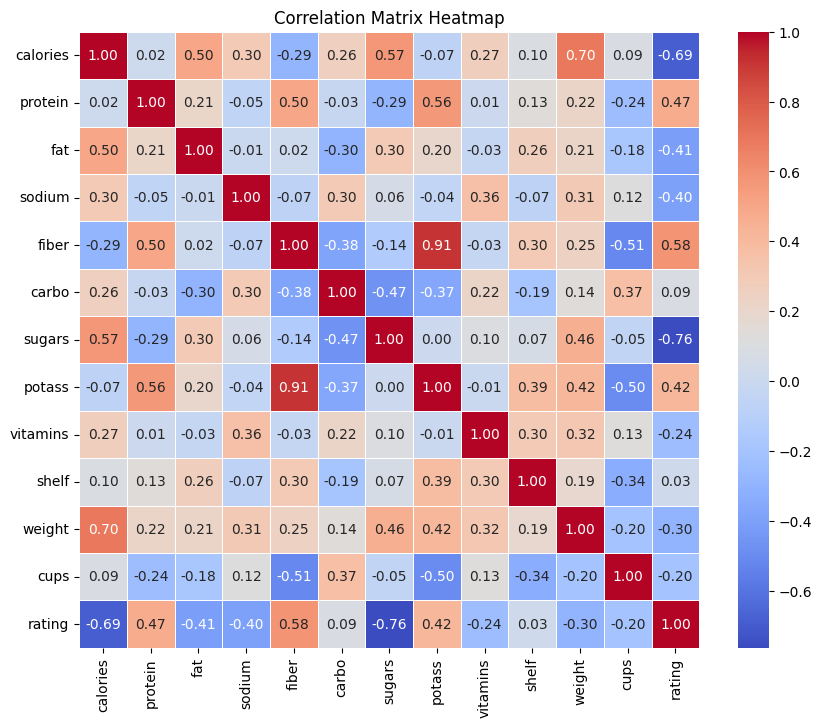

In [191]:
import seaborn as sns

corr_matrix = df.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

I. Calories and Weight, Fiber and Potassium, Fiber and rating, Protien and Potassium, Calories and Sugars have the highest correlation  
II. If we just include the variables from the list above (Fiber, Calories, Wieght, Potassium, Rating, and Protein) we can reduce the number of variables  
III. Making the data normalized does not have a change in the correlation.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

quantitave = df.select_dtypes(include = ['float64', 'int64'])
quantitave = quantitave.fillna(0)
normalized_data = StandardScaler().fit_transform(quantitave)


pca = PCA(n_components=13)
pca.fit(normalized_data)

pc1 = pca.components_[0]
pc1_df = pd.DataFrame({'Variable': quantitave.columns, 'PC1 Contribution': pc1})
pc1_df["Abs"] = pc1_df["PC1 Contribution"].abs()
pc1_df = pc1_df.sort_values(by="Abs", ascending=False)

print(pc1_df)

    Variable  PC1 Contribution       Abs
12    rating          0.454547  0.454547
4      fiber          0.428821  0.428821
7     potass          0.361066  0.361066
0   calories         -0.332993  0.332993
1    protein          0.303270  0.303270
11      cups         -0.272312  0.272312
6     sugars         -0.266140  0.266140
3     sodium         -0.214136  0.214136
5      carbo         -0.193407  0.193407
8   vitamins         -0.149542  0.149542
9      shelf          0.115137  0.115137
10    weight         -0.093128  0.093128
2        fat         -0.061127  0.061127


The Principle Component is a combination of the oringal values with each magnitude telling how the data is skewed with positives being in one direction and the negative being in the other.

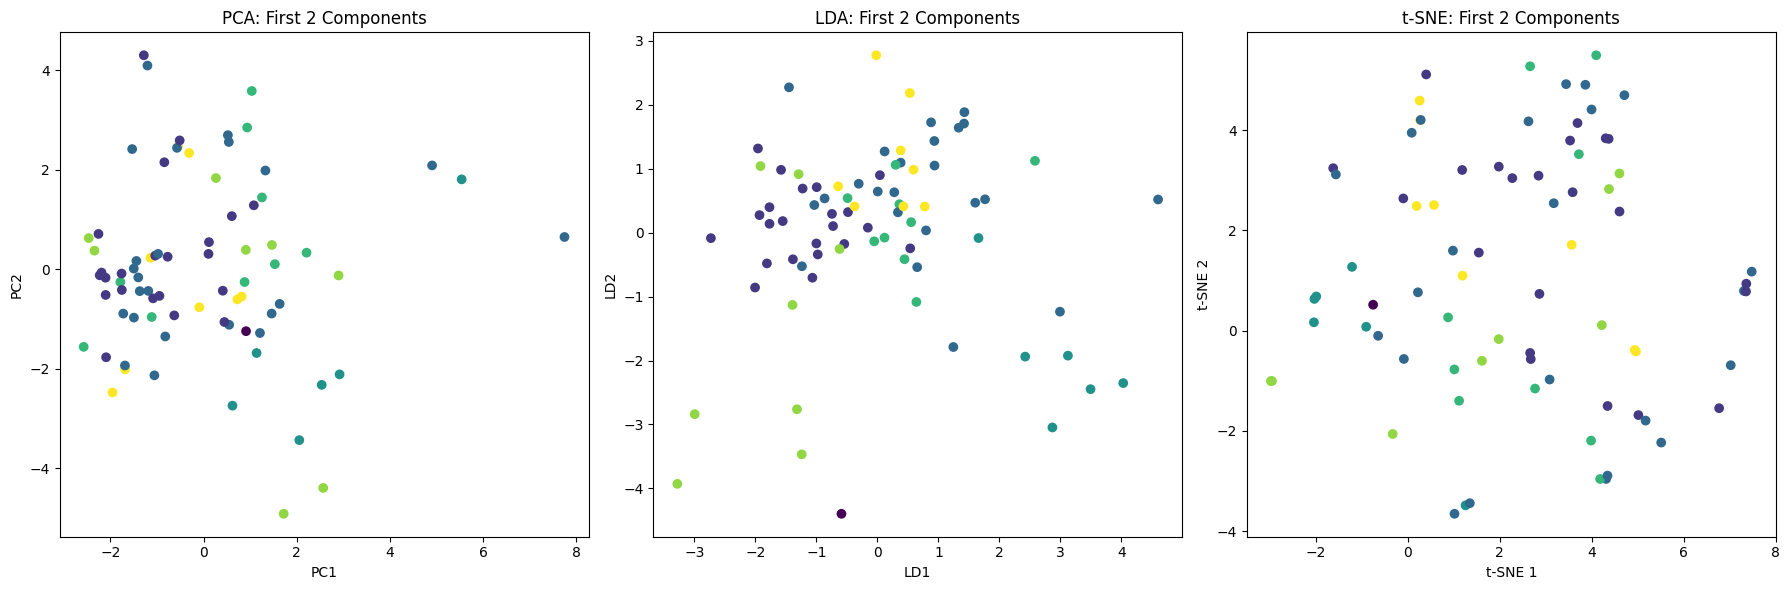

In [9]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn import preprocessing as pp

ordinal = pp.OrdinalEncoder()

target = ordinal.fit_transform(df["mfr"].to_numpy().reshape(-1,1)).ravel()


# Standardize the data for PCA, LDA, and t-SNE
scaled_data = StandardScaler().fit_transform(quantitave)

# Step 1: Apply PCA
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(scaled_data)

# Step 2: Apply LDA (needs labeled data)
lda = LDA(n_components=2)
lda_result = lda.fit_transform(scaled_data, target)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Step 4: Visualize the results

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA Plot
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap='viridis')
axes[0].set_title('PCA: First 2 Components')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# LDA Plot
axes[1].scatter(lda_result[:, 0], lda_result[:, 1], c=target, cmap='viridis')
axes[1].set_title('LDA: First 2 Components')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')

# t-SNE Plot
axes[2].scatter(tsne_result[:, 0], tsne_result[:, 1], c=target, cmap='viridis')
axes[2].set_title('t-SNE: First 2 Components')
axes[2].set_xlabel('t-SNE 1')
axes[2].set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()


Target was the manufacturer  
With PCA and LDA there is a visible clustering of data points with PCA just having them all grouped together and LDA having better clustering making sure to take out some of the things that were similar. t-SNE didnt have much clustering as stuff was just out in all different directions. Slight clustering could be determined but not as much as the other two.